Hackathon - Analytics Vidhya

    Importing necessary packages required for the analysis

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

    Reading Test and Train data and saving the original copy so that we can retain the original fields if needed.

In [3]:
test = pd.read_csv("test_YCcRUnU.csv")

In [4]:
train = pd.read_csv("train_Df64byy.csv")

In [5]:
test_original = test.copy()
train_original = train.copy()

In [6]:
train.shape

(50882, 14)

In [7]:
train.columns

Index(['ID', 'City_Code', 'Region_Code', 'Accomodation_Type',
       'Reco_Insurance_Type', 'Upper_Age', 'Lower_Age', 'Is_Spouse',
       'Health Indicator', 'Holding_Policy_Duration', 'Holding_Policy_Type',
       'Reco_Policy_Cat', 'Reco_Policy_Premium', 'Response'],
      dtype='object')

In [8]:
train.head()

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0


In [10]:
train.dtypes

ID                           int64
City_Code                   object
Region_Code                  int64
Accomodation_Type           object
Reco_Insurance_Type         object
Upper_Age                    int64
Lower_Age                    int64
Is_Spouse                   object
Health Indicator            object
Holding_Policy_Duration     object
Holding_Policy_Type        float64
Reco_Policy_Cat              int64
Reco_Policy_Premium        float64
Response                     int64
dtype: object

    Analysing the data to get the gist of distribution, so that we can relate to the predictions.

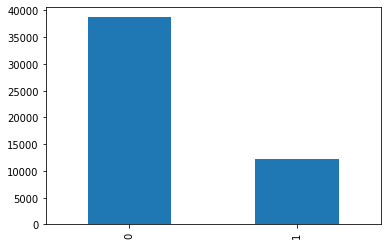

In [11]:
train['Response'].value_counts().plot.bar()

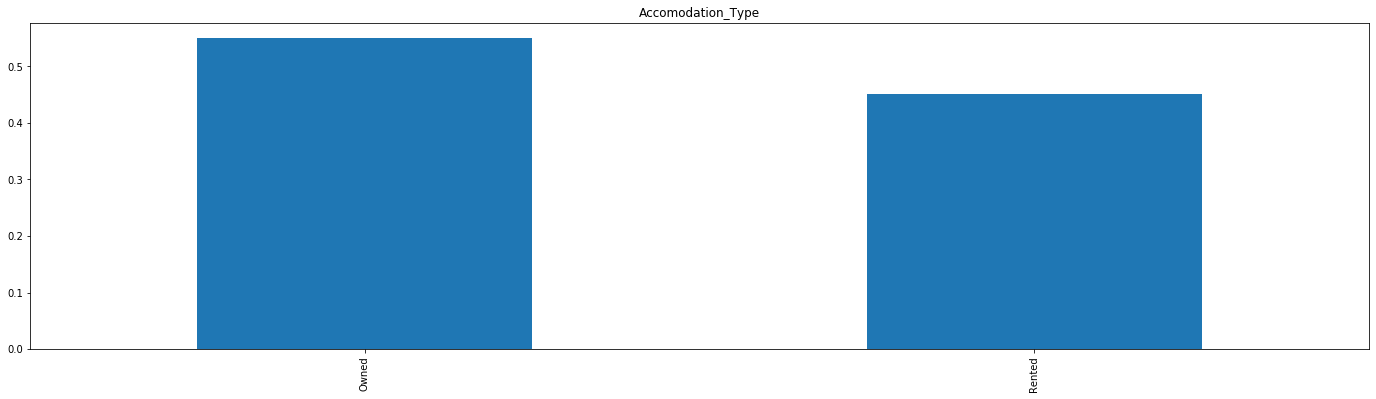

In [12]:
train['Accomodation_Type'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Accomodation_Type')

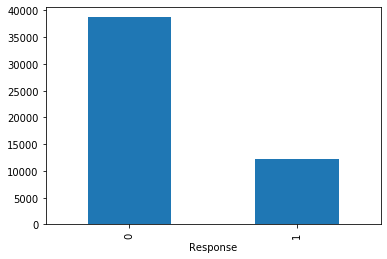

In [18]:
train.groupby('Response')['Reco_Insurance_Type'].count().plot.bar()

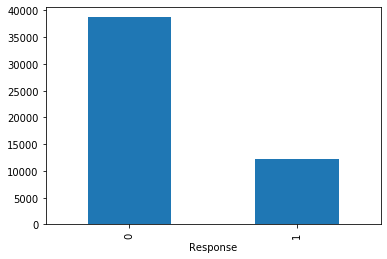

In [101]:
train.groupby('Response')['Reco_Policy_Premium'].count().plot.bar()

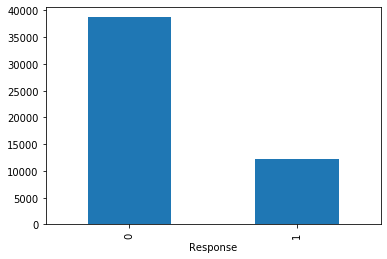

In [105]:
train.groupby('Response')['Reco_Policy_Cat'].count().plot.bar()

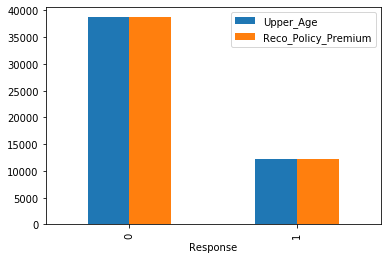

In [112]:
train.groupby('Response')['Upper_Age','Reco_Policy_Premium'].count().plot.bar()

    Now, we will see the colinearity between the variable's we have.
    - We see that Reco Policy premium and age have high colinearity.

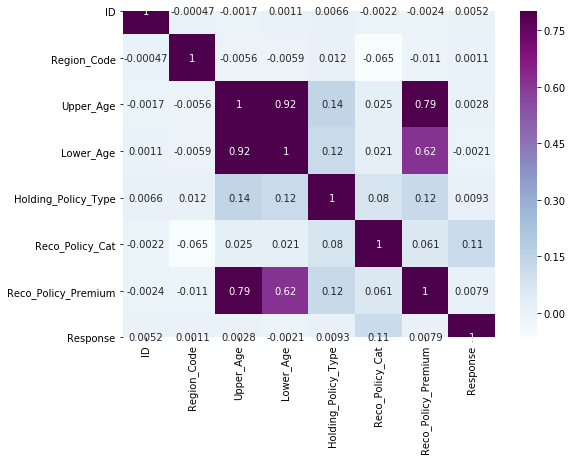

In [20]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

In [23]:
train.isnull().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [24]:
train['Holding_Policy_Duration'].fillna(train['Holding_Policy_Duration'].mode()[0], inplace=True)
train['Health Indicator'].fillna(train['Health Indicator'].mode()[0], inplace=True)
train['Holding_Policy_Type'].fillna(train['Holding_Policy_Type'].mode()[0], inplace=True)

In [25]:
train.isnull().sum()

ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64

In [26]:
test.isnull().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

    We will check for null values if any and fill those , so that we don't have any missing values, and our model performs better.

In [27]:
test['Holding_Policy_Duration'].fillna(test['Holding_Policy_Duration'].mode()[0], inplace=True)
test['Health Indicator'].fillna(test['Health Indicator'].mode()[0], inplace=True)
test['Holding_Policy_Type'].fillna(test['Holding_Policy_Type'].mode()[0], inplace=True)

In [29]:
train=train.drop('ID',axis=1)
test=test.drop('ID',axis=1)

In [31]:
X = train.drop('Response',1)
y = train.Response

In [34]:
X = pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

    We will split the training data in train and calidation set

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.7592531935800851

In [40]:
pred_test = model.predict(test)
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [118]:
submission = pd.read_csv('sample_submission_QrCyCoT.csv')
submission.head()

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0


In [120]:
type(submission.Response[0])

numpy.int64

In [46]:
submission.shape

(21805, 2)

In [47]:
submission['Response']=pred_test
submission['ID']=test_original['ID']

In [49]:
submission.shape

(21805, 2)

In [53]:
pd.DataFrame(submission, columns=['ID','Response']).to_csv('Health_Insurance_oP_logistic.csv')

### Decision Tree

In [56]:
from sklearn.model_selection import StratifiedKFold
from sklearn import tree
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('\n Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.6738724575022109

2 of kfold 5 
accuracy_score 0.6705315908420949

3 of kfold 5 
accuracy_score 0.6712194163309423

4 of kfold 5 
accuracy_score 0.6672562893081762

5 of kfold 5 
accuracy_score 0.6777395577395577

 Mean Validation Accuracy 0.6721238623445964


In [60]:
submission['Response']=pred_test
submission['ID']=test_original['ID']

In [61]:
submission

,ID,Response
0,50883,0
1,50884,0
2,50885,1
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,1


In [62]:
pd.DataFrame(submission, columns=['ID','Response']).to_csv('Health_Insurance_oP_DecisionTree.csv')

### Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr,ytr)
    pred_test=model.predict(xvl)
    score=accuracy_score(yvl,pred_test)
    mean += score
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('Mean Validation Accuracy',mean/(i-1))

1 of kfold 5 
accuracy_score 0.759948904392257
2 of kfold 5 
accuracy_score 0.7600471651763782
3 of kfold 5 
accuracy_score 0.7596541220398939
4 of kfold 5 
accuracy_score 0.7600235849056604
5 of kfold 5 
accuracy_score 0.7600982800982801
Mean Validation Accuracy 0.7599544113224939


In [78]:
submission['Response']=pred_test
submission['ID']=test_original['ID']

In [80]:
submission
pd.DataFrame(submission, columns=['ID','Response']).to_csv('Health_Insurance_oP_RandomForestClassifier.csv')

### Grid Search

In [116]:
from sklearn.model_selection import GridSearchCV
paramgrid = {'max_depth': list(range(1,20,2)), 'n_estimators': list(range(1,200,20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=1)
grid_search.fit(x_train,y_train)
GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161,
                                          181]})
grid_search.best_estimator_
RandomForestClassifier(max_depth=5, n_estimators=41, random_state=1)
i=1
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
    print ('\n{} of kfold {} '.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
    model.fit(xtr,ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    mean += score
    print('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print('Mean Validation Accuracy',mean/(i-1))


1 of kfold 5 
accuracy_score 0.7600471651763782

2 of kfold 5 
accuracy_score 0.7600471651763782

3 of kfold 5 
accuracy_score 0.7600471651763782

4 of kfold 5 
accuracy_score 0.7600235849056604

5 of kfold 5 
accuracy_score 0.7600982800982801
Mean Validation Accuracy 0.760052672106615


In [85]:
submission['Response']=pred_test
submission['ID']=test_original['ID']

In [87]:
submission
pd.DataFrame(submission, columns=['ID','Response']).to_csv('Health_Insurance_oP_GridSearchCV.csv')

### Feature Selection

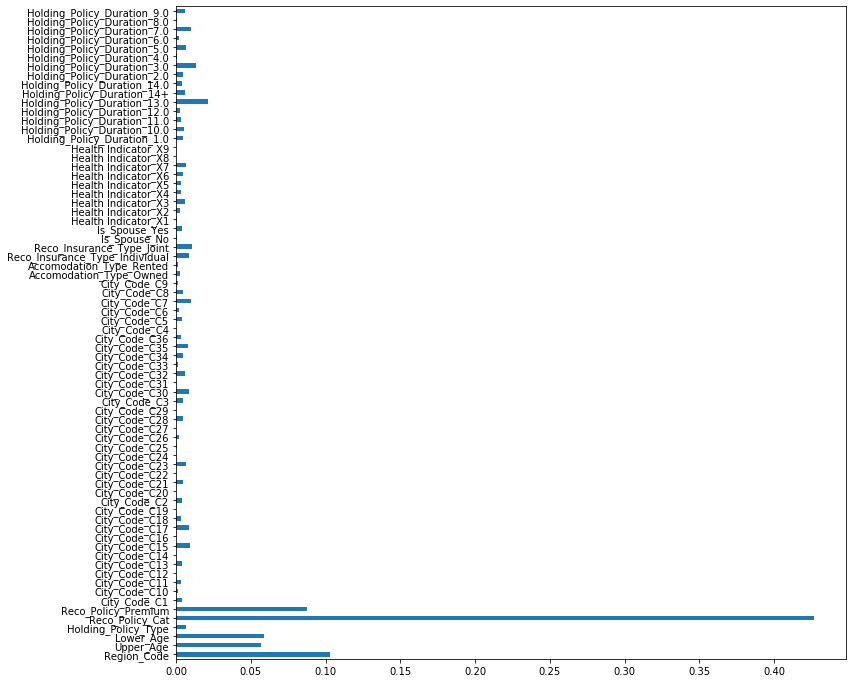

In [117]:
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.plot(kind='barh', figsize=(12,12))

    We observe that Reco_Policy_Cat , Reco_Policy_premium, Age are the important features in our data that help us predict better. 

### XGBoost

In [121]:
from xgboost import XGBClassifier
i=1 
mean = 0
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for train_index,test_index in kf.split(X,y): 
    print('{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[train_index],X.loc[test_index] 
    ytr,yvl = y[train_index],y[test_index] 
    model = XGBClassifier(n_estimators=50, max_depth=4) 
    model.fit(xtr, ytr) 
    pred_test = model.predict(xvl) 
    score = accuracy_score(yvl,pred_test) 
    mean += score
    print ('accuracy_score',score)
    i+=1
    pred_test = model.predict(test)
    pred = model.predict_proba(xvl)[:,1]
print ('Mean Validation Accuracy',mean/(i-1))

1 of kfold 5
accuracy_score 0.759948904392257
2 of kfold 5
accuracy_score 0.7594576004716518
3 of kfold 5
accuracy_score 0.7603419475287413
4 of kfold 5
accuracy_score 0.7595322327044025
5 of kfold 5
accuracy_score 0.7607862407862408
Mean Validation Accuracy 0.7600133851766586


In [124]:
from sklearn.metrics import roc_auc_score

In [122]:
submission['Response']=pred_test
submission['ID']=test_original['ID']

In [133]:
# /roc_auc_score(y, model.predict_proba(train_ori.ginal)[:,1])

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields City_Code, Accomodation_Type, Reco_Insurance_Type, Is_Spouse, Health Indicator, Holding_Policy_Duration

In [123]:
type(submission.Response[0])

numpy.int64

In [94]:
pd.DataFrame(submission, columns=['ID','Response']).to_csv('Health_Insurance_oP_XGB.csv')

From the accuracies, we see that Random Forest and XGBoost perform nearly same